In [1]:
import pandas as pd
import numpy as np

## Decision Tree Algorithm

In [2]:
horse_df = pd.read_csv("horse.csv")

In [3]:
horse_df.shape

(299, 28)

In [4]:
horse_df.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data'],
      dtype='object')

In [5]:
horse_df.dtypes

surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
outcome                   object
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
dtype: object

In [6]:
horse_df.outcome.unique()

array(['died', 'euthanized', 'lived'], dtype=object)

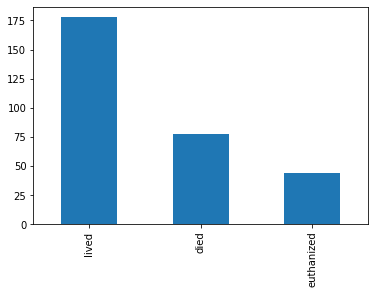

In [7]:
horse_df.outcome.value_counts().plot.bar()

In [8]:
category_variables = ['surgery', 'age', 'temp_of_extremities','peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces',
     'abdomen','abdomo_appearance', 'surgical_lesion','cp_data']

# perform one hot encoding on various features in my dataset

horse_encoded_df = pd.get_dummies(horse_df[category_variables])

horse_encoded_df.shape

(299, 56)

In [9]:
## perform label encoding on the target column
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(horse_df["outcome"])

In [10]:
y

array([0, 1, 2, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 1, 1, 2, 2, 0, 0, 2, 2, 1,
       1, 0, 2, 2, 0, 0, 2, 0, 2, 2, 1, 0, 2, 0, 0, 0, 2, 2, 0, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 0, 0, 0, 1, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 1,
       2, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 1, 0,
       0, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 1, 2, 2, 2, 1, 2, 0, 0,
       2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2, 0, 2, 0, 0, 2, 2,
       0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2,
       2, 2, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 1, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 2, 1, 0, 0, 2, 2, 0, 1, 0, 2, 0, 2, 2, 2, 0, 2,
       1, 2, 2, 2, 2, 0, 2, 2, 0, 1, 0, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1,
       2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 2, 1])

In [11]:
horse_df["outcome"]

0            died
1      euthanized
2           lived
3            died
4            died
          ...    
294    euthanized
295    euthanized
296          died
297         lived
298    euthanized
Name: outcome, Length: 299, dtype: object

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( horse_encoded_df , y, test_size=0.2,
                                                     random_state = 21)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(239, 56)
(239,)
(60, 56)
(60,)


In [13]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
X_train = imp.fit_transform(X_train)
X_test = imp.fit_transform(X_test)

In [14]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier() #instantiating the estimator object 
dt_model.fit(X_train,y_train)
y_predict = dt_model.predict(X_test)

## Evaluating classification model

In [15]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_predict,y_test)
print("The Prediction accuracy of the Decision Tree model on testing data is: " , accuracy)

The Prediction accuracy of the Decision Tree model on testing data is:  0.6


In [16]:
y_pred_train = dt_model.predict(X_train)
accuracy = accuracy_score(y_pred_train,y_train)
print("The Prediction accuracy of the Decision Tree model on training data is: " , accuracy)

The Prediction accuracy of the Decision Tree model on training data is:  0.99581589958159


## Prune our decision tree to avoid overfitting

In [17]:
dt_prune = DecisionTreeClassifier(max_depth=4) #instantiating the estimator object 
dt_prune.fit(X_train,y_train)
y_predict = dt_prune.predict(X_test)

In [18]:
accuracy = accuracy_score(y_predict,y_test)
print("The Prediction accuracy of the Decision Tree model on testing data is: " , accuracy)

The Prediction accuracy of the Decision Tree model on testing data is:  0.6


In [19]:
y_pred_train = dt_prune.predict(X_train)
accuracy = accuracy_score(y_pred_train,y_train)
print("The Prediction accuracy of the Decision Tree model on training data is: " , accuracy)

The Prediction accuracy of the Decision Tree model on training data is:  0.7447698744769874


## RandomForestClassifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=150,random_state=21)

In [28]:
rfc.fit(X_train,y_train)
y_pred_rfc=rfc.predict(X_test)
accuracy=accuracy_score(y_test,y_pred_rfc)
print(accuracy)

0.6833333333333333


In [29]:
from sklearn import datasets
from sklearn.ensemble import AdaBoostClassifier

iris=datasets.load_iris()

X=iris.data
y=iris.target

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X , y, test_size=0.3,
                                                     random_state = 21)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


In [31]:
ada_model=AdaBoostClassifier(n_estimators=80)

In [32]:
ada_model.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=80, random_state=None)

In [33]:
y_pred_ada=ada_model.predict(X_test)
accuracy_ada=accuracy_score(y_test,y_pred_ada)
print(accuracy_ada)

0.9333333333333333


In [36]:
y_train_adat=ada_model.predict(X_train)
accuracy_ada_t=accuracy_score(y_train,y_train_adat)
print(accuracy_ada_t)

1.0
